### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Read the mouse data and the study results
mouse_data = pd.read_csv("../Downloads/Mouse_metadata.csv")
study_data = pd.read_csv("../Downloads/Study_results.csv")

In [4]:
# Display the mouse data
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
# Display the study data
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Combine the data into a single dataset and display it
mouse_study_data_df = pd.merge(mouse_data, study_data, how='left', on=['Mouse ID'])
mouse_study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_study_data_df[mouse_study_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
mouse_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_df = mouse_study_data_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


### Generating the Boxplot

In [10]:
# Determine the final timepoint for each mouse.

# Start by getting the greatest timepoint for each mouse
mouse_df= clean_df.groupby(['Mouse ID'])['Timepoint'].max()
mouse_df

Mouse ID
a203    0
a251    0
a262    0
a275    0
a366    0
       ..
z435    0
z578    0
z581    0
z795    0
z969    0
Name: Timepoint, Length: 249, dtype: int64

In [11]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
final_df = pd.merge(mouse_df, clean_df, on=('Mouse ID','Timepoint'), how='left')
final_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a262,0,Placebo,Female,17,29,45.0,0
3,a275,0,Ceftamin,Female,20,28,45.0,0
4,a366,0,Stelasyn,Female,16,29,45.0,0
...,...,...,...,...,...,...,...,...
244,z435,0,Propriva,Female,12,26,45.0,0
245,z578,0,Ramicane,Male,11,16,45.0,0
246,z581,0,Infubinol,Female,24,25,45.0,0
247,z795,0,Naftisol,Female,13,29,45.0,0


In [14]:
# Create a list with all 10 drug regimens.
#drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens2 = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
# Create a empty list to fill with the tumor vol data
tumor_vol_data = []

# Isolate (filter) each mice on each drug to collect their tumor volume.
    #was very confused on this part
    # Locate the rows which match the drug and get the final tumor volumes of all mice
for drug in drug_regimens2:
    iso = final_df.loc[final_df["Drug Regimen"] == drug]
    # Append the outcome to the empty list previously created.
    tumor_vol_data.append(iso['Tumor Volume (mm3)'])
tumor_vol_data

[6      45.0
 7      45.0
 10     45.0
 12     45.0
 33     45.0
 37     45.0
 45     45.0
 52     45.0
 70     45.0
 77     45.0
 78     45.0
 92     45.0
 94     45.0
 97     45.0
 120    45.0
 127    45.0
 158    45.0
 159    45.0
 167    45.0
 169    45.0
 178    45.0
 191    45.0
 218    45.0
 236    45.0
 245    45.0
 Name: Tumor Volume (mm3), dtype: float64,
 19     45.0
 24     45.0
 61     45.0
 64     45.0
 66     45.0
 81     45.0
 84     45.0
 86     45.0
 88     45.0
 109    45.0
 116    45.0
 122    45.0
 125    45.0
 163    45.0
 164    45.0
 170    45.0
 175    45.0
 181    45.0
 184    45.0
 193    45.0
 205    45.0
 209    45.0
 221    45.0
 227    45.0
 240    45.0
 Name: Tumor Volume (mm3), dtype: float64,
 0      45.0
 1      45.0
 11     45.0
 13     45.0
 27     45.0
 31     45.0
 41     45.0
 50     45.0
 56     45.0
 79     45.0
 98     45.0
 102    45.0
 124    45.0
 130    45.0
 142    45.0
 143    45.0
 154    45.0
 171    45.0
 198    45.0
 201    45.0
 203

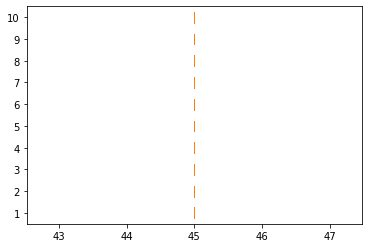

In [15]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.
flierprops = dict(marker='o', markerfacecolor='r', markersize= 20)
plt.boxplot(tumor_vol_data, flierprops = flierprops,  vert= False)
# Define a custom shape for all outliers in the visualization
# Create horizontal box and whisker plot
plt.show()